### quest(NSC2_BND_M20_DecisionTreeClassifier)
- NSC2_BND_M20 사용(목표변수:SICK_SYM1, 연속변수 5개 사용)
- quest_NSC2_BND_M20_DecisionTreeClassifier 전처리, 학습, 평가

In [1]:
import pandas as pd

In [2]:
df_BND_M20=pd.read_csv('../../../datasets/NSC2_BND_M20.csv')
df_BND_M20[:2]

C:\Users\01-03\AppData\Local\Temp\ipykernel_2476\237629605.py:1: DtypeWarning: Columns (3,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_BND_M20=pd.read_csv('../../../datasets/NSC2_BND_M20.csv')


,Unnamed: 0,_id,RN_INDI,BTH_YYYY,DTH_YYYYMM,COD1,COD2,RN_KEY,RN_INST,MDCARE_STRT_DT,...,OPRTN_YN,MDCARE_DD_CNT,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY
0,0,64e6b7f1f4500c263e561efd,294364,1921LE,200707.0,T08-T14,W00-W19,2002080298703,26452,20020830,...,0,1,1,3,5.0,0.15,10590,3000,7590,2002
1,1,64e6b7f1f4500c263e561efe,294364,1921LE,200707.0,T08-T14,W00-W19,2002090466395,63715,20020910,...,0,1,1,2,5.0,0.15,16520,4950,11570,2002


In [3]:
df_BND_M20.columns

Index(['Unnamed: 0', '_id', 'RN_INDI', 'BTH_YYYY', 'DTH_YYYYMM', 'COD1',
       'COD2', 'RN_KEY', 'RN_INST', 'MDCARE_STRT_DT', 'FORM_CD',
       'MCARE_SUBJ_CD', 'SICK_SYM1', 'OFIJ_TYPE', 'OPRTN_YN', 'MDCARE_DD_CNT',
       'VSHSP_DD_CNT', 'TOT_PRSC_DD_CNT', 'MCARE_RSLT_TYPE', 'EDC_ADD_RT',
       'ED_RC_TOT_AMT', 'EDC_SBA', 'EDC_INSUR_BRDN_AMT', 'STD_YYYY'],
      dtype='object')

In [4]:
df_BND_M20.isnull().sum()

Unnamed: 0                 0
_id                        0
RN_INDI                    0
BTH_YYYY                   0
DTH_YYYYMM            126894
COD1                  128690
COD2                  136165
RN_KEY                     0
RN_INST                    0
MDCARE_STRT_DT             0
FORM_CD                    0
MCARE_SUBJ_CD              0
SICK_SYM1                  0
OFIJ_TYPE               2735
OPRTN_YN                   0
MDCARE_DD_CNT              0
VSHSP_DD_CNT               0
TOT_PRSC_DD_CNT            0
MCARE_RSLT_TYPE         3205
EDC_ADD_RT                 0
ED_RC_TOT_AMT              0
EDC_SBA                    0
EDC_INSUR_BRDN_AMT         0
STD_YYYY                   0
dtype: int64

#### 연속형 데이터 채택(null 값 많지 않은 것 중)
- SICK_SYM1 주상병 => 변환 예정
- BTH_YYYY 출생년도 => LE 행 drop 필요
- VSHSP_DD_CNT 입내원일수
- TOT_PRSC_DD_CNT 총처방일수
- EDC_ADD_RT 심결가산율
- EDC_SBA 심결본인부담금

#### 미채택
- MDCARE_STRT_DT 요양개시일자 => 변환 필요(귀찮아서 제외)
- ED_RC_TOT_AMT 심결요양급여비용총액
- EDC_INSUR_BRDN_AMT 심결보험자부담금

In [5]:
drd_BND_M20=df_BND_M20[['SICK_SYM1','BTH_YYYY','VSHSP_DD_CNT','TOT_PRSC_DD_CNT','EDC_ADD_RT','EDC_SBA']]
drd_BND_M20[:2]

,SICK_SYM1,BTH_YYYY,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,EDC_ADD_RT,EDC_SBA
0,L028,1921LE,1,3,0.15,3000
1,J030,1921LE,1,2,0.15,4950


In [6]:
drd_BND_M20.isnull().sum()

SICK_SYM1          0
BTH_YYYY           0
VSHSP_DD_CNT       0
TOT_PRSC_DD_CNT    0
EDC_ADD_RT         0
EDC_SBA            0
dtype: int64

#### 전처리 - SICK_SYM1

In [7]:
lst_sym1=drd_BND_M20.value_counts('SICK_SYM1').index.to_list()
lst_sym1=sorted(lst_sym1)
lst_sym1

['A04',
 'A044',
 'A048',
 'A049',
 'A05',
 'A058',
 'A059',
 'A062',
 'A069',
 'A08',
 'A083',
 'A084',
 'A085',
 'A09',
 'A090',
 'A099',
 'A419',
 'A488',
 'A49',
 'A491',
 'A493',
 'A498',
 'A499',
 'A59',
 'A690',
 'A759',
 'A878',
 'A879',
 'A_',
 'B00',
 'B000',
 'B001',
 'B002',
 'B005',
 'B0058',
 'B008',
 'B0088',
 'B009',
 'B02',
 'B022',
 'B023',
 'B028',
 'B029',
 'B07',
 'B081',
 'B082',
 'B083',
 'B09',
 'B17',
 'B170',
 'B178',
 'B179',
 'B18',
 'B189',
 'B199',
 'B259',
 'B279',
 'B30',
 'B300',
 'B301',
 'B302',
 'B308',
 'B309',
 'B33',
 'B330',
 'B338',
 'B348',
 'B349',
 'B35',
 'B350',
 'B351',
 'B352',
 'B353',
 'B354',
 'B356',
 'B358',
 'B359',
 'B36',
 'B360',
 'B368',
 'B369',
 'B37',
 'B370',
 'B371',
 'B372',
 'B378',
 'B3788',
 'B379',
 'B430',
 'B432',
 'B699',
 'B85',
 'B850',
 'B853',
 'B854',
 'B86',
 'B880',
 'B882',
 'B889',
 'B980',
 'B_',
 'C088',
 'C159',
 'C16',
 'C1601',
 'C162',
 'C1620',
 'C1630',
 'C168',
 'C169',
 'C1690',
 'C1699',
 'C18',


In [8]:
def lst_to_dict(lst):
    result_dict = {}
    for idx, value in enumerate(lst, start=1):
        result_dict[value] = idx
    return result_dict

dict_sym1 = lst_to_dict(lst_sym1)
dict_sym1

{'A04': 1,
 'A044': 2,
 'A048': 3,
 'A049': 4,
 'A05': 5,
 'A058': 6,
 'A059': 7,
 'A062': 8,
 'A069': 9,
 'A08': 10,
 'A083': 11,
 'A084': 12,
 'A085': 13,
 'A09': 14,
 'A090': 15,
 'A099': 16,
 'A419': 17,
 'A488': 18,
 'A49': 19,
 'A491': 20,
 'A493': 21,
 'A498': 22,
 'A499': 23,
 'A59': 24,
 'A690': 25,
 'A759': 26,
 'A878': 27,
 'A879': 28,
 'A_': 29,
 'B00': 30,
 'B000': 31,
 'B001': 32,
 'B002': 33,
 'B005': 34,
 'B0058': 35,
 'B008': 36,
 'B0088': 37,
 'B009': 38,
 'B02': 39,
 'B022': 40,
 'B023': 41,
 'B028': 42,
 'B029': 43,
 'B07': 44,
 'B081': 45,
 'B082': 46,
 'B083': 47,
 'B09': 48,
 'B17': 49,
 'B170': 50,
 'B178': 51,
 'B179': 52,
 'B18': 53,
 'B189': 54,
 'B199': 55,
 'B259': 56,
 'B279': 57,
 'B30': 58,
 'B300': 59,
 'B301': 60,
 'B302': 61,
 'B308': 62,
 'B309': 63,
 'B33': 64,
 'B330': 65,
 'B338': 66,
 'B348': 67,
 'B349': 68,
 'B35': 69,
 'B350': 70,
 'B351': 71,
 'B352': 72,
 'B353': 73,
 'B354': 74,
 'B356': 75,
 'B358': 76,
 'B359': 77,
 'B36': 78,
 'B360': 79

In [9]:
def sym1_to_int(value, dictionary):
    return dictionary.get(value)

drd_BND_M20['SICK_SYM1'] = drd_BND_M20['SICK_SYM1'].apply(sym1_to_int, args=(dict_sym1,))
drd_BND_M20['SICK_SYM1']

C:\Users\01-03\AppData\Local\Temp\ipykernel_2476\3026585629.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drd_BND_M20['SICK_SYM1'] = drd_BND_M20['SICK_SYM1'].apply(sym1_to_int, args=(dict_sym1,))


0         1508
1         1096
2         1096
3         1323
4         2125
          ... 
137158    1141
137159    1141
137160    1141
137161    1141
137162    1073
Name: SICK_SYM1, Length: 137163, dtype: int64

In [10]:
drd_BND_M20[:2]

,SICK_SYM1,BTH_YYYY,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,EDC_ADD_RT,EDC_SBA
0,1508,1921LE,1,3,0.15,3000
1,1096,1921LE,1,2,0.15,4950


#### 전처리 - BTH_YYYY

In [11]:
indexes_to_drop = drd_BND_M20[drd_BND_M20['BTH_YYYY'].astype(str).str.endswith('LE')].index
pre_BND_M20 = drd_BND_M20.drop(indexes_to_drop)
len(indexes_to_drop)

1299

In [12]:
pre_BND_M20

,SICK_SYM1,BTH_YYYY,VSHSP_DD_CNT,TOT_PRSC_DD_CNT,EDC_ADD_RT,EDC_SBA
1299,1094,1922,1,3,0.15,3000
1300,1143,1922,1,2,0.15,3000
1301,1102,1922,1,2,0.15,3000
1302,1102,1922,1,2,0.15,3000
1303,1102,1922,1,2,0.15,3000
...,...,...,...,...,...,...
137158,1141,2015,1,0,0.15,2300
137159,1141,2015,1,0,0.15,3700
137160,1141,2015,1,0,0.15,2800
137161,1141,2015,1,0,0.15,2600


#### 정형화

In [13]:
target_train = pre_BND_M20['SICK_SYM1'] # 목표변수
features_train = pre_BND_M20.drop(columns=['SICK_SYM1']) # 설명변수
target_train.shape, features_train.shape

((135864,), (135864, 5))

#### 모델 학습

In [14]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(features_train, target_train)

DecisionTreeClassifier()

In [15]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [16]:
%matplotlib inline

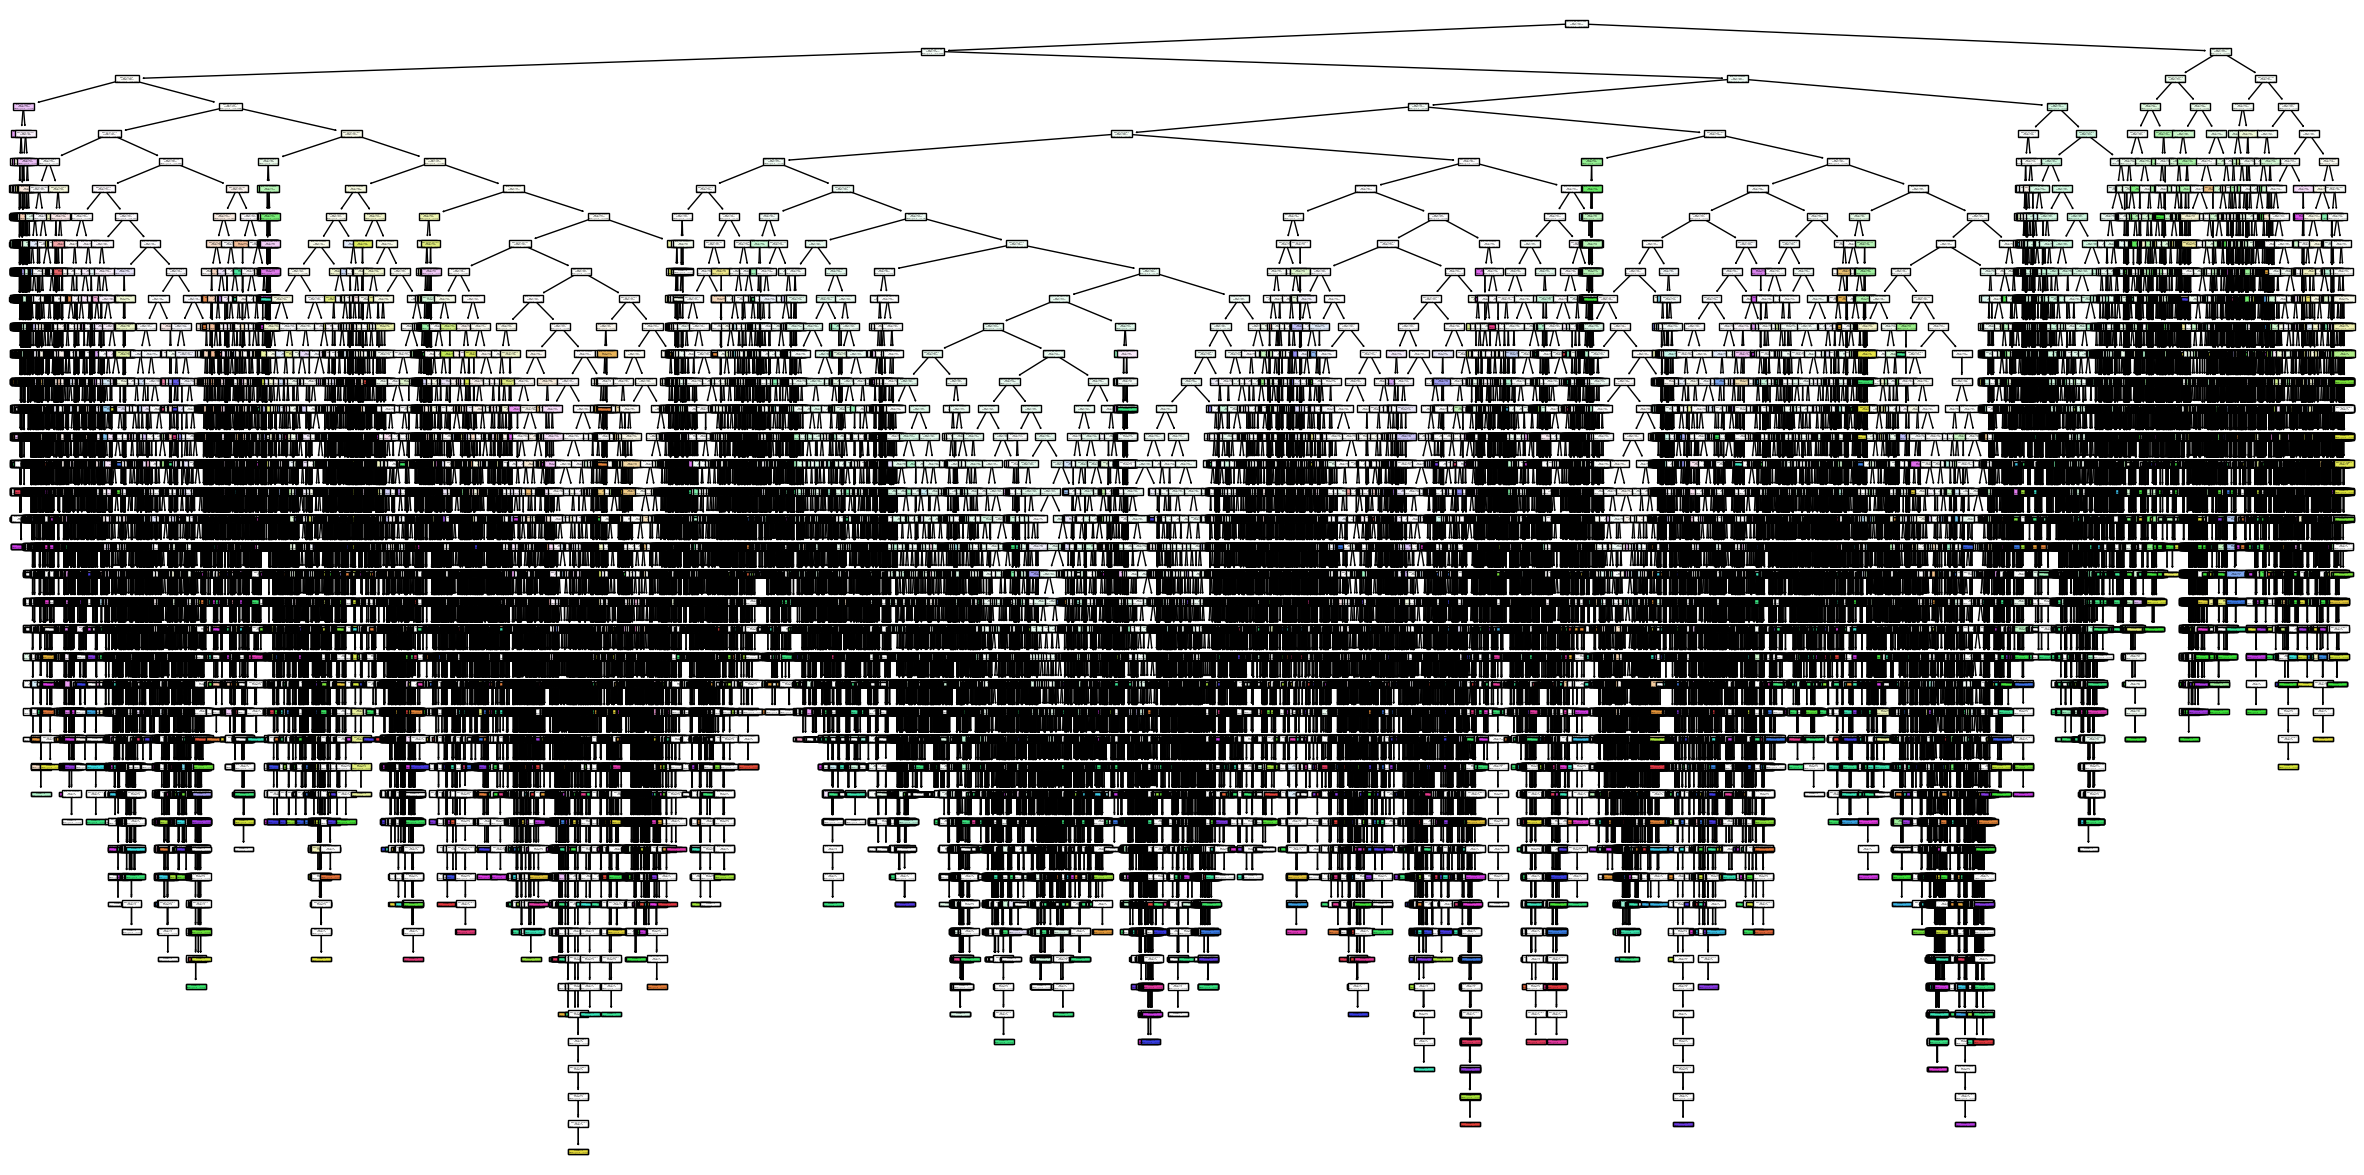

In [17]:
# plot_tree(model, feature_names=features_train.columns) # 수치와 함께 표시
plt.figure(figsize=(30,15))
plot_tree(model, feature_names=features_train.columns, filled=True)
plt.show()

#### 평가

In [20]:
target_predict = model.predict(features_train)
target_predict.shape

(135864,)

In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(target_train, target_predict)

0.6143790849673203